In [1]:
import re
!pip install hazm
import hazm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import classification_report, confusion_matrix

     |████████████████████████████████| 317kB 5.8MB/s 
     |████████████████████████████████| 235kB 25.3MB/s 
     |████████████████████████████████| 1.4MB 27.1MB/s 
  Created wheel for libwapiti: filename=libwapiti-0.2.1-cp36-cp36m-linux_x86_64.whl size=154783 sha256=91d53543e9f0790849bee20ec7341eece280c839e921b36ed7d5624e15294f0d
  Stored in directory: /root/.cache/pip/wheels/66/15/54/4510dce8bb958b1cdd2c47425cbd1e1eecc0480ac9bb1fb9ab
  Created wheel for nltk: filename=nltk-3.3-cp36-none-any.whl size=1394470 sha256=16fcd59cdaab29688bd3cbc501649d6dfb98edc6c3ba189747f93a6059bc1b90
  Stored in directory: /root/.cache/pip/wheels/d1/ab/40/3bceea46922767e42986aef7606a600538ca80de6062dc266c
Successfully built libwapiti nltk
  Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


In [2]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir("drive/My Drive/emails")
!ls

Mounted at /content/drive
hamtesting  hamtraining  spamtesting  spamtraining


In [73]:
def read_folder(name, size):
  items = []
  for i in range(1, size + 1):
    address = name + '/' + name + ' (' + str(i) + ').txt'
    with open(address, 'r', encoding='utf-8') as txt_file:
      items.append(txt_file.read())
  return items

ham_test = read_folder('hamtesting', 200)
spam_test = read_folder('spamtesting', 200)
ham_train = read_folder('hamtraining', 300)
spam_train = read_folder('spamtraining', 300)
ham_test[:5]

['\ufeffممنون آقا سامان.\nمن پارسال اصلا آزاد شرکت نکرده بودم و سراسری هم قبول نشدم. فقط میخواستم بدونم شرایط چطوریه واسه سال بعد. مرسی از راهنمایی هاتون.',
 '\ufeffدوست عزیز آقای سعیدی، کتاب حاضر را چندی پیش به سفارش یکی از مجلات قرار بود که نقدی بکنم، وقتی کتاب را مطالعه کردم، چون مشغله زیادی داشتم به یکی از دوستان دادم که نقد و معرفی از آن به رشته تحریر درآورد، و به نام خودش آن را نیز چاپ کند. دکتر دادور را نیز از طریق یکی از دانشجویانش شناختم.\nبا آن\u200cکه دکتر دادور در فرانسه دانی استاد خوبیست، اما کتاب فرهنگ نشانه-معناشناختی کتاب ضعیفی است. هم از نظر انتخاب معادل برای اصطلاحات نشانه\u200cشناسی و معناشناسی یا زبان\u200cشناسی، و هم از نظر ارائه اطلاعات فرهنگ\u200cنگاری. متاسفانه آن دوست ما خلف وعده کرد و نقد خود را ننوشت، و کاهلی کرد. اگر زمانی فرصت کنم شاید نقدی بر آن بنویسم. اگر خداوند عمری دهد. یا حق یا هو.',
 '\ufeffسلام خیلی عالی بود ممکنه اگه مقاله دیگه ای از دکتر باطنی دارید برام ایمل کنید ممنون می شم دانشجوی ارشد ادبیاتم برای تحقیق دستور بهشون احتیاج دارم . ممنون']

In [4]:
def tagging(items, tag):
  tagged_items = []
  for item in items:
    tagged_items.append([item, tag])
  return tagged_items

In [74]:
ham_test = tagging(ham_test, 'ham')
ham_train = tagging(ham_train, 'ham')
spam_test = tagging(spam_test, 'spam')
spam_train = tagging(spam_train, 'spam')


ham_test[:3]

[['\ufeffممنون آقا سامان.\nمن پارسال اصلا آزاد شرکت نکرده بودم و سراسری هم قبول نشدم. فقط میخواستم بدونم شرایط چطوریه واسه سال بعد. مرسی از راهنمایی هاتون.',
  'ham'],
 ['\ufeffدوست عزیز آقای سعیدی، کتاب حاضر را چندی پیش به سفارش یکی از مجلات قرار بود که نقدی بکنم، وقتی کتاب را مطالعه کردم، چون مشغله زیادی داشتم به یکی از دوستان دادم که نقد و معرفی از آن به رشته تحریر درآورد، و به نام خودش آن را نیز چاپ کند. دکتر دادور را نیز از طریق یکی از دانشجویانش شناختم.\nبا آن\u200cکه دکتر دادور در فرانسه دانی استاد خوبیست، اما کتاب فرهنگ نشانه-معناشناختی کتاب ضعیفی است. هم از نظر انتخاب معادل برای اصطلاحات نشانه\u200cشناسی و معناشناسی یا زبان\u200cشناسی، و هم از نظر ارائه اطلاعات فرهنگ\u200cنگاری. متاسفانه آن دوست ما خلف وعده کرد و نقد خود را ننوشت، و کاهلی کرد. اگر زمانی فرصت کنم شاید نقدی بر آن بنویسم. اگر خداوند عمری دهد. یا حق یا هو.',
  'ham'],
 ['\ufeffسلام خیلی عالی بود ممکنه اگه مقاله دیگه ای از دکتر باطنی دارید برام ایمل کنید ممنون می شم دانشجوی ارشد ادبیاتم برای تحقیق دستور بهشون احتیا

In [75]:
train_data = pd.DataFrame(ham_train + spam_train, columns=['text', 'tag'])
test_data = pd.DataFrame(ham_test + spam_test, columns=['text', 'tag'])

train_data = train_data.sample(frac = 1)
train_data.reset_index(drop=True, inplace=True)
test_data = test_data.sample(frac = 1)
test_data.reset_index(drop=True, inplace=True)

train_data.head()

,text,tag
0,﻿ شما فشن ديزاينر خودتان خواهيد بود\n\n\n*مي...,spam
1,﻿با معیین موافقم. مفروضات مسئله اشتباهه. مثل ا...,ham
2,﻿سلام.\nمن هم دانشجوی دکتر دبیرمقدم نبوده ام ،...,ham
3,﻿\n\n\n Eynak SHAB 2011 == عینک شب جدید\n\n...,spam
4,﻿\n\nبه مناسبت فرا رسیدن میلاد دخت پیامبر گرام...,spam


In [76]:
test_data.shape

(400, 2)

split data

preprocess

In [9]:
class const:

    farsi = ('ب', 'س', 'ش', 'ل', 'ت', 'ن', 'م', 'گ', 'ظ', 'ط', 'ز',
             'ر', 'ژ', 'ذ', 'د', 'پ', 'چ', 'ج', 'ح', 'ع', 'خ', 'غ', 'ف', 'ق', 'ث', 'ص', 'ض', ' ')

    alef = ('ا', 'آ', 'ء', 'أ', 'إ')
    vav = ('و', 'ؤ')
    heh = ('ه', 'ة', 'ە')
    yah = ('ی', 'ي', 'ئ', 'ى')
    kaf = ('ک', 'ك')


def finder(char):
    if char in const.alef:
        return const.alef[0]
    if char in const.farsi:
        return char
    elif char in const.vav:
        return const.vav[0]
    elif char in const.heh:
        return const.heh[0]
    elif char in const.yah:
        return const.yah[0]
    elif char in const.kaf:
        return const.kaf[0]
    return ''

def remove_non_farsi(text):
  text=text.replace("\n", " ")
  map_test = map(finder, text)
  result = ''.join(map_test)
  return result

In [11]:
from hazm import Normalizer
normalizer = Normalizer()
train_data['text']=train_data['text'].apply(normalizer.normalize)
train_data['text']=train_data['text'].apply(remove_non_farsi)
test_data['text']=test_data['text'].apply(normalizer.normalize)
test_data['text']=test_data['text'].apply(remove_non_farsi)

In [16]:
from hazm import Stemmer, word_tokenize, utils, Lemmatizer
stemmer=Stemmer()
lemmatizer=Lemmatizer()
def final_clean(text):
  words=[ lemmatizer.lemmatize(stemmer.stem(w)) for w in word_tokenize(text) if w not in utils.stopwords_list()]
  return ' '.join(words)

train_data['text']=train_data['text'].apply(final_clean)
test_data['text']=test_data['text'].apply(final_clean)

In [17]:
train_data.head()

,text,tag
0,پروفسور ج هیک عزیز احترا ارزو ملاق جناب اقا به...,ham
1,دریاف رایگ کد پست شماره موبایل دریاف رایگ کد پ...,spam
2,ایا ترکیه سفر کردهاید اموز مکال ترک استانبول ا...,spam
3,دانشگاه لولیا سوید تهر برگزار میکند کارشناس ار...,spam
4,سلا احترا بدینوسیله پیرو نامه شماره تاریخ اهال...,ham


vectorize

In [78]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

In [79]:
X_train = train_data.text.to_list()
y_train = train_data.tag.to_list()
X_test = test_data.text.to_list()
y_test = test_data.tag.to_list()

In [80]:
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [81]:
transformer_500 = SelectKBest(chi2, k=500).fit(X_train_vec, y_train)
X_train_vec_500 = transformer_500.transform(X_train_vec)
X_test_vec_500 = transformer_500.transform(X_test_vec)

In [82]:
transformer_200 = SelectKBest(chi2, k=200).fit(X_train_vec, y_train)
X_train_vec_200 = transformer_200.transform(X_train_vec)
X_test_vec_200 = transformer_200.transform(X_test_vec)

In [116]:
print(vectorizer.get_feature_names())

['00', '000', '000_', '000تومان', '000ریال', '001', '0020429814', '0020429819', '004', '00447', '004470', '00492219235707', '00584126399935', '0060102770028', '0060146322900', '0060176484801', '00989151161977', '01', '0100828356006', '0102497433007', '0105901858009', '0131', '02', '021', '02165958670', '02166690002', '02166699936', '02177746790', '02188106554', '0218853109', '02188531091', '02188531092', '02188554921', '02188712340', '02188759679', '025', '026', '0281', '02درخصوص', '03', '0301117391006', '031', '03624392552', '04', '04113291461', '04113291462', '04فاکتور', '04نسبت', '05', '05116099424', '05in', '05درخصوص', '06', '06112274391', '07', '0711', '07313342832', '08', '0861', '08pm', '09', '09106827750', '09113556276', '09116096073', '09117194971', '0912', '09121035870', '09121592281', '09121713342', '09122023449', '09123070569', '09123634046', '09123774661', '09124981217', '09125050204', '091251', '09125789962', '09126037931', '09127154424', '09130001688', '09130001866', '09

Text(0.5, 0, '$\\chi^2$')

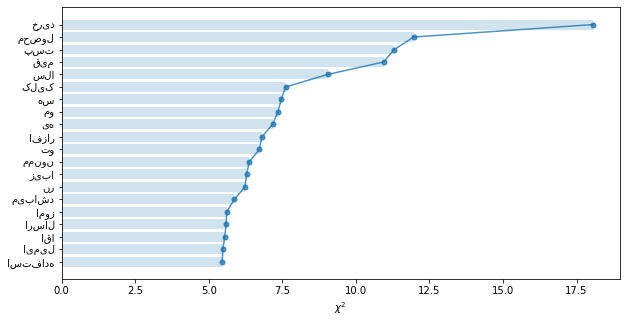

In [24]:
chi2score = chi2(X_train_vec, y_train)[0]
plt.figure(figsize=(10,5))
wscores = zip(vectorizer.get_feature_names(), chi2score)
wchi2 = sorted(wscores, key=lambda x:x[1])
topchi2 = list(zip(*wchi2[-20:]))
x = range(len(topchi2[1]))
labels = topchi2[0]
plt.barh(x,topchi2[1], align='center', alpha=0.2)
plt.plot(topchi2[1], x, '-o', markersize=5, alpha=0.8)
plt.yticks(x, labels)
plt.xlabel('$\chi^2$')

Hyper parameter

In [84]:
  from sklearn.metrics import accuracy_score
  for k in range(2, 10):
    knn = kNN(k)
    knn.train(X_train_vec, y_train)
    knn_predictions = knn.predict(X_test_vec)
    print("-----------------------------------------------------------")
    print(k)
    print(accuracy_score(y_test, knn_predictions))

-----------------------------------------------------------
2
0.9525
-----------------------------------------------------------
3
0.955
-----------------------------------------------------------
4
0.955
-----------------------------------------------------------
5
0.9575
-----------------------------------------------------------
6
0.96
-----------------------------------------------------------
7
0.9675
-----------------------------------------------------------
8
0.9625
-----------------------------------------------------------
9
0.9525


#**KNN with 500**

In [118]:
knn=kNN(7)
knn.train(X_train_vec_500, y_train)
knn_predictions = knn.predict(X_test_vec_500)
print(classification_report(y_test, knn_predictions))

              precision    recall  f1-score   support

         ham       0.93      0.98      0.95       200
        spam       0.98      0.93      0.95       200

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400



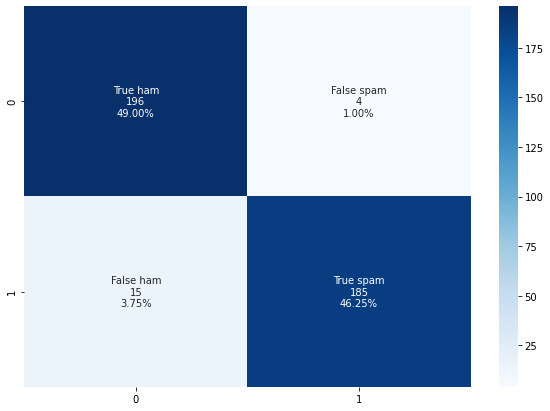

In [86]:
import seaborn as sn

cm = confusion_matrix(y_test, knn_predictions)

group_names = ['True ham','False spam','False ham','True spam']
group_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=labels, fmt='', cmap='Blues')

plt.show()

#**KNN with 200**

In [117]:
knn=kNN(7)
knn.train(X_train_vec_200, y_train)
knn_predictions = knn.predict(X_test_vec_200)
print(classification_report(y_test, knn_predictions))

              precision    recall  f1-score   support

         ham       0.93      0.97      0.95       200
        spam       0.97      0.93      0.95       200

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400



**KNN implementation**

In [29]:
# basic function for checking similarity I do not use it in my KNN, butit is easity to change it.
def getSimilarity(record1, record2):
    len1 = len(record1[0].split())
    len2 = len(record2[0].split())
    num_common = 0
    d = dict()
    for word in record1[0].split():
    	if word not in d:
    		d[word] = 1
    for word in record2[0].split():
    	if word in d:
    		num_common += 1
    similarity = num_common / (len1 * len2) ** 0.5
    return similarity

In [53]:
def computeIDF(docList):
    import math
    idfDict = {}
    N = len(docList)
    word_bag=set(docList[1].split(" "))
    for i in range(N):
      words1=docList[i].split(" ")
      word_bag =set(word_bag).union(set(words1))

    idfDict = dict.fromkeys(word_bag, 0)
    for doc in docList:
        wordSet= set()
        for words in doc.split(" "):
          if words not in wordSet:
            idfDict[words] += 1
            wordSet.union(set(words))
    
    for word, val in idfDict.items():
        idfDict[word] = math.log10(N / float(val))
    
    print(idfDict)
   
    return idfDict

In [44]:
IDF= computeIDF(train_data['text'])

{'': 0.24754264470133097, 'استوک': 1.8303747831935504, 'مگن': 1.8303747831935504, 'فابل': 2.7788744720027396, 'اینجنین': 2.7788744720027396, 'وح': 2.1789769472931693, 'دروق': 2.478566495593843, 'وبا': 1.744648525084329, 'مراقبه': 2.7788744720027396, 'همتا': 2.478566495593843, 'حدودهزار': 2.7788744720027396, 'استخر': 2.1789769472931693, 'خودکارقل': 2.7788744720027396, 'ادرس': 0.9018256644631839, 'اسپان': 2.7788744720027396, 'بیحس': 2.478566495593843, 'نخواهی_دا': 2.7788744720027396, 'درمقارب': 2.478566495593843, 'مدید': 2.7788744720027396, 'هاشم': 2.478566495593843, 'چرارا': 2.7788744720027396, 'ومنتظریک': 2.7788744720027396, 'ومجوز': 2.7788744720027396, 'داده_نشده_اس': 2.478566495593843, 'کمه': 2.303196057420489, 'روستا': 2.0043213737826426, 'باستحضار': 2.478566495593843, 'اتم': 2.478566495593843, 'ترجیح': 2.478566495593843, 'تصم': 1.2828897701394677, 'ازفر': 2.7788744720027396, 'گلادیاتور': 2.478566495593843, 'دانشپرواز': 2.7788744720027396, 'ریییسشونو': 2.7788744720027396, 'نقش': 2.0

In [107]:
def tf_idf(old, new):
    tf_idf = 0
    for word in new.split():
      if word in IDF:
        tf_idf += np.log(old.count(word)+1) * IDF[word]
    return tf_idf


In [61]:
import numpy


class kNN:
    """Holds information necessary to do nearest neighbors classification.
    Attribues:
     - classes  Set of the possible classes.
     - xs       List of the neighbors.
     - ys       List of the classes that the neighbors belong to.
     - k        Number of neighbors to look at.
    """

    def __init__(self, k):
        self.classes = set()
        self.xs = []
        self.ys = []
        self.k = k

    def train(self,xs, ys):
       self.xs = xs
       self.ys = ys
       self.classes = set(ys)
    def predict(self, X_test):
      similarities =cosine_similarity(X_test, self.xs)

      tags = []
      for idx in range(len(similarities)):
        nearests = np.argsort(similarities[idx])[::-1][:self.k]
        nearest_tags = [self.ys[near] for near in nearests]
        tags.append(stats.mode(nearest_tags)[0])

      return tags 
    def predict_tfidf(self, X_test):
      tags=[]
      order = []
      for X in X_test:
        for i in range(600):
              dist = tf_idf(self.xs[i], X)
              order.append((dist, i))
        order.sort()
        spam=0
        ham=0
        for dist, i in order[: self.k]:
          if knn.ys[i] is "spam":
            spam+=1
          if knn.ys[i] is "ham":
            ham+=1
        if ham>spam:  
          tags.append('ham')
        else:
          tags.append('spam')

      return tags 



In [94]:
knn=kNN(7)

In [92]:
knn.train(X_train_vec, y_train)

In [93]:
knn_predictions = knn.predict(X_test_vec)
print(classification_report(y_test, knn_predictions))

              precision    recall  f1-score   support

         ham       0.96      0.97      0.97       200
        spam       0.97      0.96      0.97       200

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



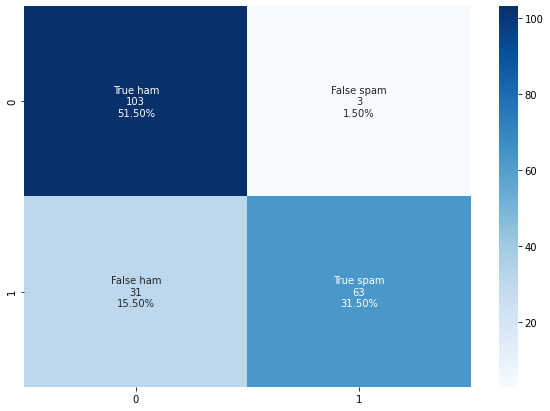

In [ ]:
import seaborn as sn
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, knn_predictions)

group_names = ['True ham','False spam','False ham','True spam']
group_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=labels, fmt='', cmap='Blues')

plt.show()

# **TF-IDF KNN**

In [119]:
knn=kNN(7)
knn.train(X_train, y_train)
knn_predictions_tfidf = knn.predict_tfidf(X_test) 


In [120]:
print(classification_report(y_test, knn_predictions))

              precision    recall  f1-score   support

         ham       0.93      0.98      0.95       200
        spam       0.98      0.93      0.95       200

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400



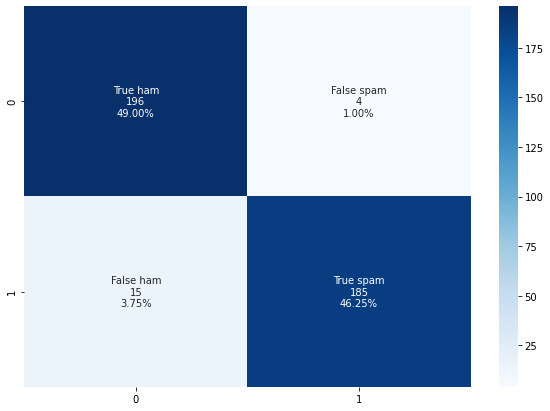

In [121]:
import seaborn as sn
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, knn_predictions)

group_names = ['True ham','False spam','False ham','True spam']
group_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=labels, fmt='', cmap='Blues')

plt.show()

#***NB MODEL***

In [88]:
from collections import defaultdict

class NaiveBayes:
    
    def __init__(self,unique_classes):
        self.classes=unique_classes
    def add(self,example,dict_index):
        if isinstance(example,np.ndarray): example=example[0]
        for token_word in example.split(): 
            self.bow_dicts[dict_index][token_word]+=1 
            
    def train(self,dataset,labels):
    
        self.data=dataset
        self.labels=labels
        self.bow_dicts=np.array([defaultdict(lambda:0) for index in range(self.classes.shape[0])])
                
        if not isinstance(self.data,np.ndarray): 
          self.data=np.array(self.data)
        if not isinstance(self.labels,np.ndarray): 
          self.labels=np.array(self.labels)
        for cat_index,cat in enumerate(self.classes):
            all_cat_data=self.data[self.labels==cat]
            cleaned_data=pd.DataFrame(data=all_cat_data)
            np.apply_along_axis(self.add,1,cleaned_data,cat_index)
      
        prob_classes=np.empty(self.classes.shape[0])
        all_words=[]
        cat_word_counts=np.empty(self.classes.shape[0])
        for cat_index,cat in enumerate(self.classes):
            prob_classes[cat_index]=np.sum(self.labels==cat)/float(self.labels.shape[0]) 
            count=list(self.bow_dicts[cat_index].values())
            cat_word_counts[cat_index]=np.sum(np.array(list(self.bow_dicts[cat_index].values())))+1
            all_words+=self.bow_dicts[cat_index].keys()
                                                     
        
        self.vocab=np.unique(np.array(all_words))
        self.vocab_length=self.vocab.shape[0]
                                  
        denoms=np.array([cat_word_counts[cat_index]+self.vocab_length+1 for cat_index,cat in enumerate(self.classes)])                                                                          
        
        self.cats_info=[(self.bow_dicts[cat_index],prob_classes[cat_index],denoms[cat_index]) for cat_index,cat in enumerate(self.classes)]                               
        self.cats_info=np.array(self.cats_info)                                 
                                              
                                              
    def getExampleProb(self,test_example):                                                   
                                              
        likelihood_prob=np.zeros(self.classes.shape[0]) 
        for cat_index,cat in enumerate(self.classes): 
            for test_token in test_example.split():           
                test_token_counts=self.cats_info[cat_index][0].get(test_token,0)+1
                test_token_prob=test_token_counts/float(self.cats_info[cat_index][2])                         
                likelihood_prob[cat_index]+=np.log(test_token_prob)
                                              
        post_prob=np.empty(self.classes.shape[0])
        for cat_index,cat in enumerate(self.classes):
            post_prob[cat_index]=likelihood_prob[cat_index]+np.log(self.cats_info[cat_index][1])                                  
        return post_prob
   
    def test(self,test_set):
        predictions=[] 
        for data in test_set:                              
            post_prob=self.getExampleProb(data)
            predictions.append(self.classes[np.argmax(post_prob)])
                
        return np.array(predictions)

In [89]:
nb=NaiveBayes(np.unique(y_train))
nb.train(X_train,y_train)

In [90]:
nb_prediction=nb.test(X_test)
print(classification_report(y_test, nb_prediction))

              precision    recall  f1-score   support

         ham       0.93      0.99      0.96       200
        spam       0.99      0.93      0.96       200

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400



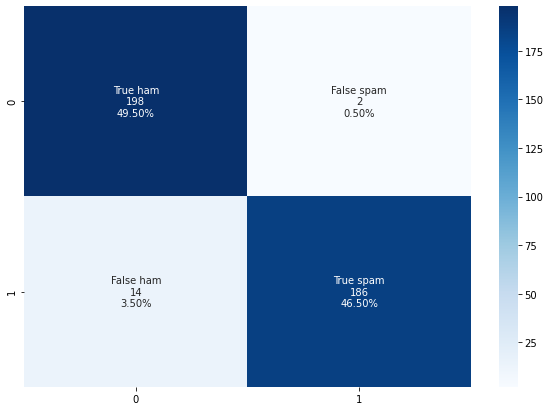

In [113]:
import seaborn as sn

cm = confusion_matrix(y_test, nb_prediction)

group_names = ['True ham','False spam','False ham','True spam']
group_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=labels, fmt='', cmap='Blues')

plt.show()